## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Load Data

In [4]:
train = pd.read_csv("../data/process/train_wrangling.csv")
test = pd.read_csv("../data/process/test_wrangling.csv")

## Objective

Explore the data relationships of all your features and understand how the features compare to the response variable.  
● Build data profiles and tables  
○ Inferential statistics  
● Explore data relationships  
○ Data visualization  
● Feature Selection and Engineering

In [5]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,False,False,False,True,0,False,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,False,False,False,True,0,False,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,False,False,False,True,0,False,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,True,True,True,True,2,False,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,False,True,True,True,2,False,91.0,4250.0,67.06,5500.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

## Explore each individual variable

### `policy_id`
Unique identifier of the policyholder

Check id uniqueness

In [8]:
train["policy_id"].is_unique

True

### `policy_tenure`
Time period of the policy

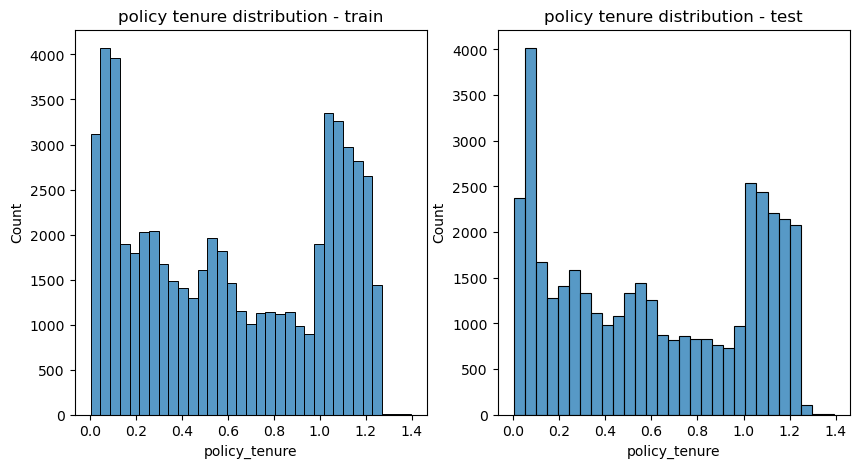

In [9]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "policy_tenure", data = train, ax = ax[0])
ax[0].set_title("policy tenure distribution - train")
sns.histplot(x = "policy_tenure", data = test, ax = ax[1])
ax[1].set_title("policy tenure distribution - test")

plt.show()

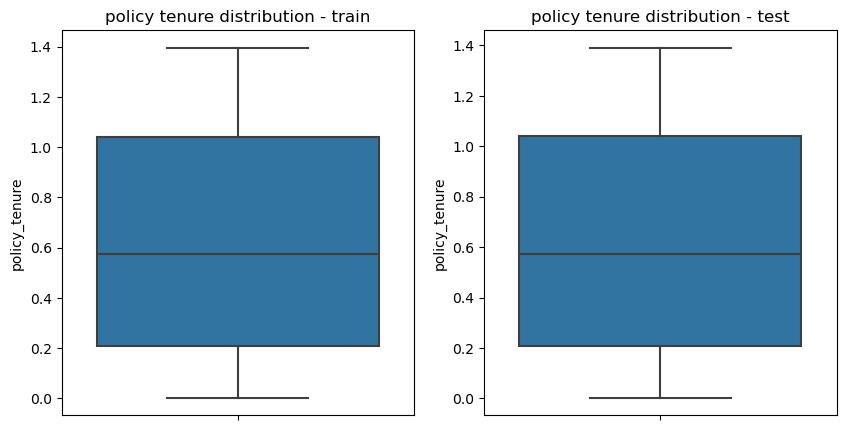

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(y = "policy_tenure", data = train, ax = ax[0])
ax[0].set_title("policy tenure distribution - train")
sns.boxplot(y = "policy_tenure", data = test, ax = ax[1])
ax[1].set_title("policy tenure distribution - test")

plt.show()

In [11]:
print(train["policy_tenure"].describe())
print("-" * 35)
print(test["policy_tenure"].describe())

count    58592.000000
mean         0.611246
std          0.414156
min          0.002735
25%          0.210250
50%          0.573792
75%          1.039104
max          1.396641
Name: policy_tenure, dtype: float64
-----------------------------------
count    39063.000000
mean         0.611304
std          0.415005
min          0.002745
25%          0.208958
50%          0.574078
75%          1.040936
max          1.391398
Name: policy_tenure, dtype: float64


### `age_of_car`
Normalized age of the car in years

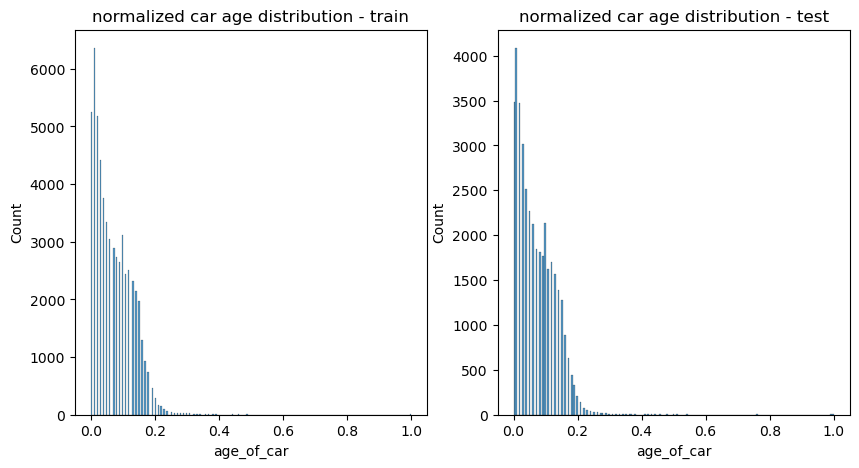

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "age_of_car", data = train, ax = ax[0])
ax[0].set_title("normalized car age distribution - train")
sns.histplot(x = "age_of_car", data = test, ax = ax[1])
ax[1].set_title("normalized car age distribution - test")

plt.show()

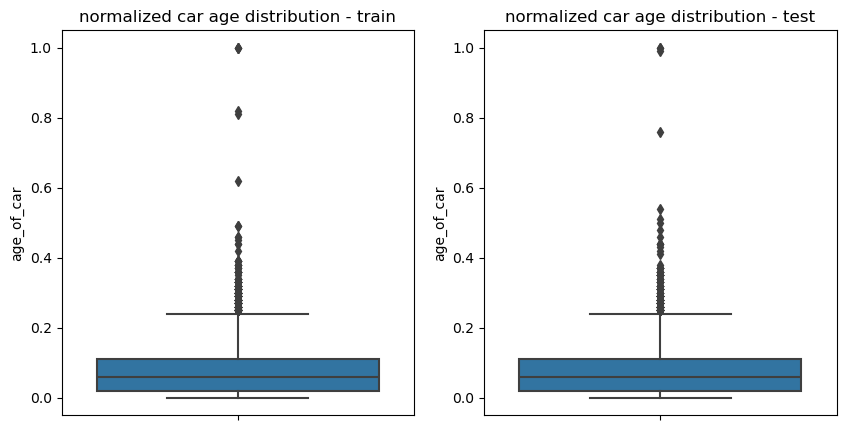

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(y = "age_of_car", data = train, ax = ax[0])
ax[0].set_title("normalized car age distribution - train")
sns.boxplot(y = "age_of_car", data = test, ax = ax[1])
ax[1].set_title("normalized car age distribution - test")

plt.show()

In [14]:
print(train["age_of_car"].describe())
print("-" * 35)
print(test["age_of_car"].describe())

count    58592.000000
mean         0.069424
std          0.056721
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64
-----------------------------------
count    39063.000000
mean         0.069635
std          0.056854
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64


### `age_of_policyhoder`
Normalized age of policyholder in years

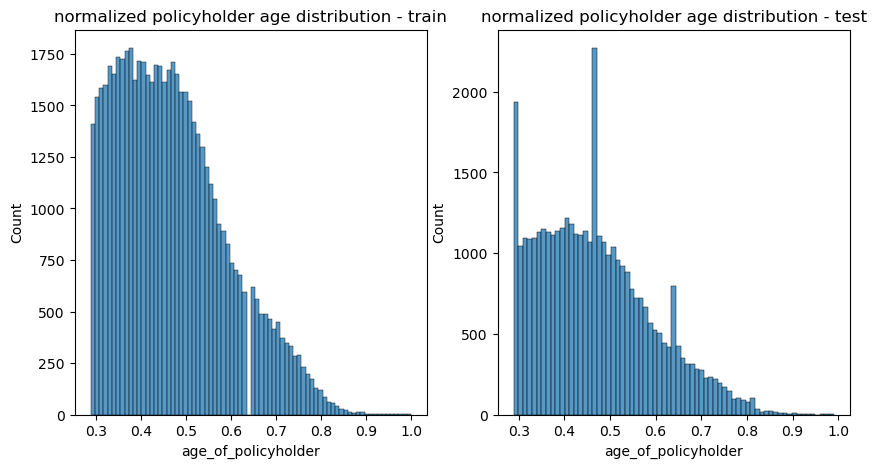

In [15]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "age_of_policyholder", data = train, ax = ax[0])
ax[0].set_title("normalized policyholder age distribution - train")
sns.histplot(x = "age_of_policyholder", data = test, ax = ax[1])
ax[1].set_title("normalized policyholder age distribution - test")

plt.show()

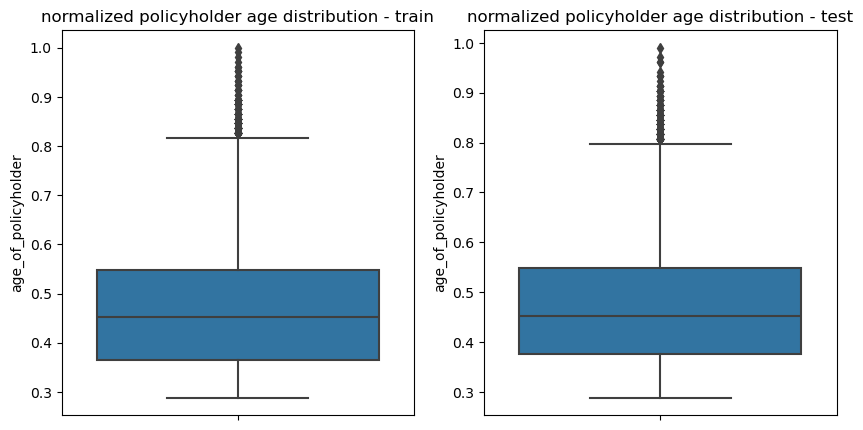

In [16]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(y = "age_of_policyholder", data = train, ax = ax[0])
ax[0].set_title("normalized policyholder age distribution - train")
sns.boxplot(y = "age_of_policyholder", data = test, ax = ax[1])
ax[1].set_title("normalized policyholder age distribution - test")

plt.show()

In [17]:
print(train["age_of_policyholder"].describe())
print("-" * 35)
print(test["age_of_policyholder"].describe())

count    58592.000000
mean         0.469420
std          0.122886
min          0.288462
25%          0.365385
50%          0.451923
75%          0.548077
max          1.000000
Name: age_of_policyholder, dtype: float64
-----------------------------------
count    39063.000000
mean         0.469087
std          0.122072
min          0.288462
25%          0.375000
50%          0.451923
75%          0.548077
max          0.990385
Name: age_of_policyholder, dtype: float64


### `area_cluster`
Area cluster of the policyholder

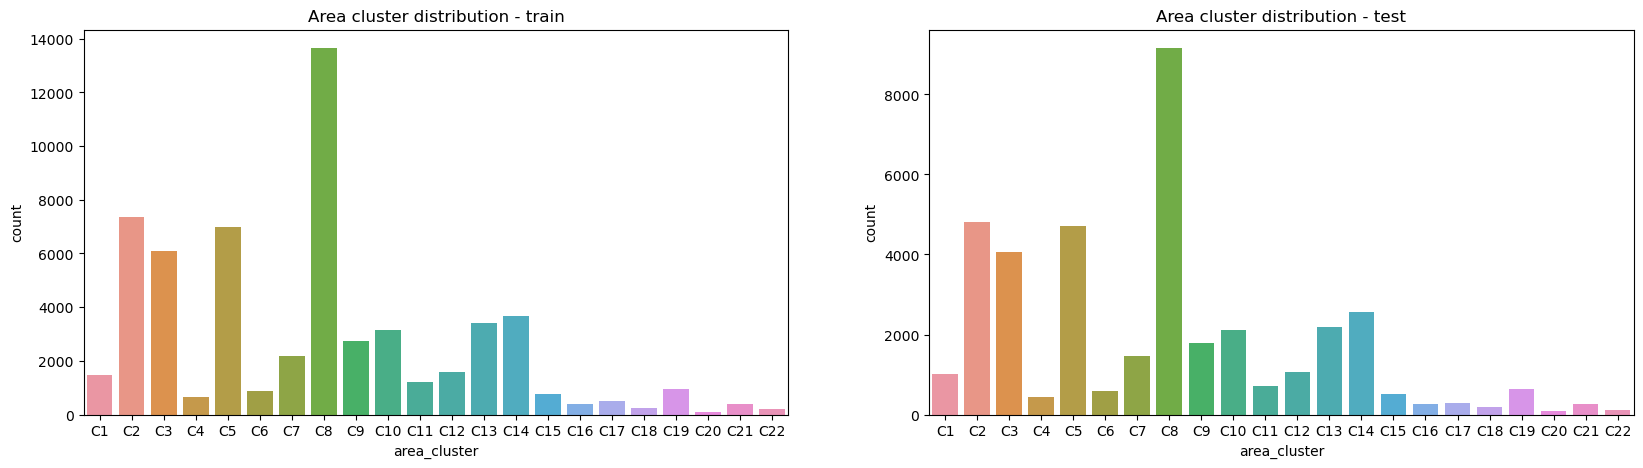

In [18]:
fig, ax = plt.subplots(1,2, figsize = (20, 5))
sns.countplot(x = "area_cluster", data = train, ax = ax[0])
ax[0].set_title("Area cluster distribution - train")
sns.countplot(x = "area_cluster", data = test, ax = ax[1], order = [f"C{x}" for x in range(1, 23)])
ax[1].set_title("Area cluster distribution - test")

plt.show()

In [19]:
train["area_cluster"] = train["area_cluster"].astype("category")
test["area_cluster"] = test["area_cluster"].astype("category")

### `population_density`
Population density of the city (Policyholder City)

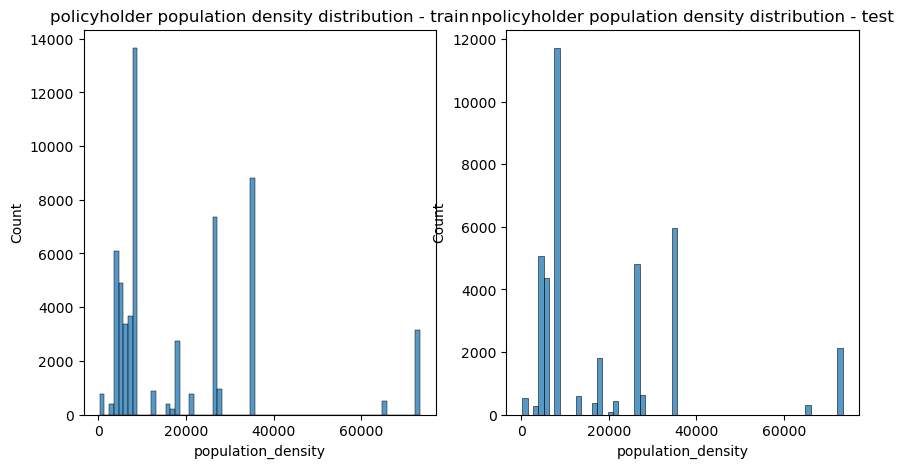

In [20]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "population_density", data = train, ax = ax[0])
ax[0].set_title("policyholder population density distribution - train")
sns.histplot(x = "population_density", data = test, ax = ax[1])
ax[1].set_title("npolicyholder population density distribution - test")

plt.show()

In [21]:
print(len(train["population_density"].unique()), "values / different citys")
print(train["population_density"].value_counts(normalize = True))

22 values / different citys
population_density
8794     0.233035
27003    0.125307
34738    0.119112
4076     0.104127
7788     0.062466
5410     0.058421
73430    0.053847
17804    0.046662
6112     0.036985
34791    0.027120
4990     0.025055
6108     0.020685
27742    0.016248
13051    0.015190
290      0.013159
21622    0.011350
65567    0.008397
16206    0.006844
3264     0.006468
35036    0.004130
16733    0.003533
20905    0.001860
Name: proportion, dtype: float64


In [22]:
print(len(test["population_density"].unique()), "values / different citys")
print(test["population_density"].value_counts(normalize = True))

22 values / different citys
population_density
8794     0.234519
27003    0.123288
34738    0.120421
4076     0.104216
7788     0.065407
5410     0.056191
73430    0.054220
17804    0.046079
6112     0.037427
34791    0.027315
4990     0.025728
6108     0.017971
27742    0.016102
13051    0.015334
290      0.013235
21622    0.011443
65567    0.007578
16206    0.007040
3264     0.006938
35036    0.004582
16733    0.002790
20905    0.002176
Name: proportion, dtype: float64


### `make`
Encoded Manufacturer/company of the car

In [23]:
print(train["make"].value_counts(normalize = True))
print("-" * 25)
print(test["make"].value_counts(normalize = True))

make
1    0.650703
3    0.239248
2    0.040500
5    0.036080
4    0.033469
Name: proportion, dtype: float64
-------------------------
make
1    0.649361
3    0.239741
2    0.042239
5    0.035686
4    0.032972
Name: proportion, dtype: float64


In [24]:
train["make"] = train["make"].astype("category")
test["make"] = test["make"].astype("category")

c:\Users\DIEGO MEZA\anaconda3\envs\CarInsuranceEnv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DIEGO MEZA\anaconda3\envs\CarInsuranceEnv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


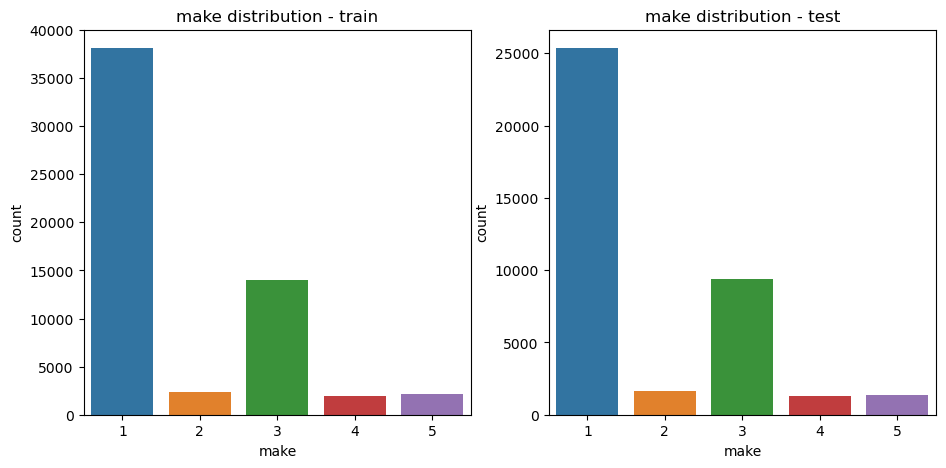

In [25]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "make", data = train, ax = ax[0])
ax[0].set_title("make distribution - train")
sns.countplot(x = "make", data = test, ax = ax[1])
ax[1].set_title("make distribution - test")

plt.show()

### `segment`
Segment of the car (A/ B1/ B2/ C1/ C2)

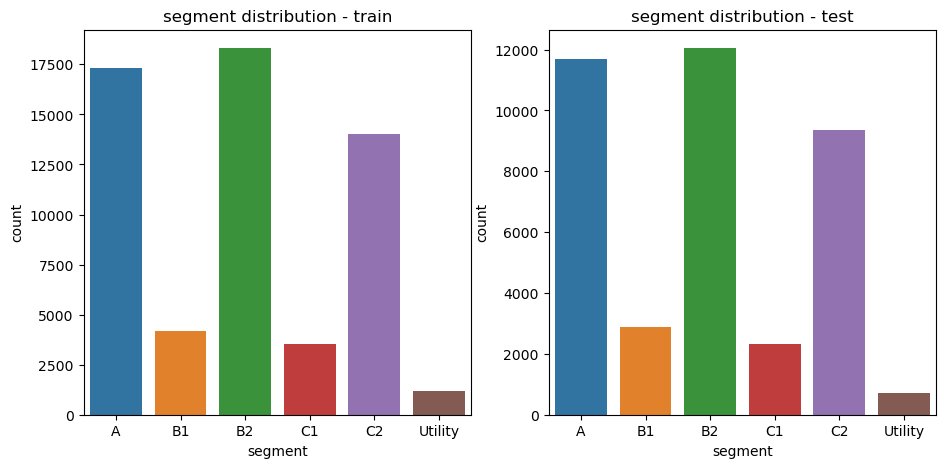

In [26]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "segment", data = train, ax = ax[0], order = ["A", "B1", "B2", "C1", "C2", "Utility"])
ax[0].set_title("segment distribution - train")
sns.countplot(x = "segment", data = test, ax = ax[1], order = ["A", "B1", "B2", "C1", "C2", "Utility"])
ax[1].set_title("segment distribution - test")

plt.show()

In [27]:
train["segment"] = train["segment"].astype("category")
test["segment"] = test["segment"].astype("category")

### `model`
Encoded name of the car

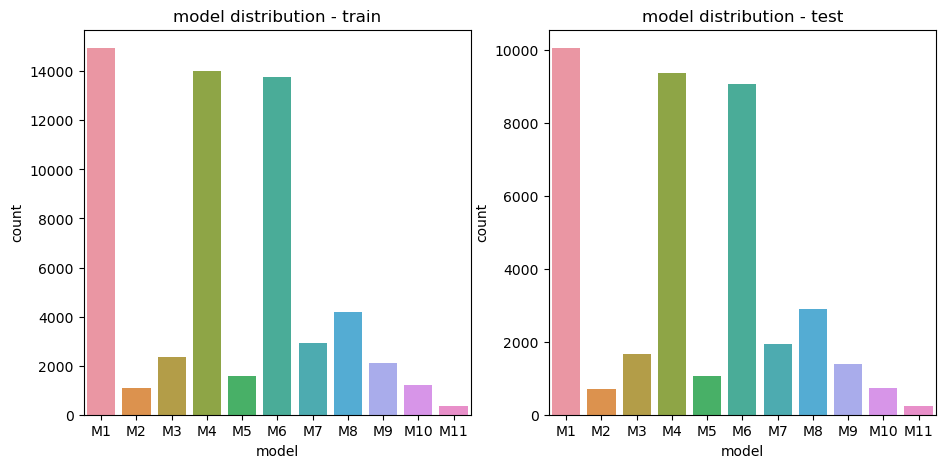

In [28]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "model", data = train, ax = ax[0])
ax[0].set_title("model distribution - train")
sns.countplot(x = "model", data = test, ax = ax[1], order = [f"M{x}" for x in range(1, 12)])
ax[1].set_title("model distribution - test")

plt.show()

In [29]:
train["model"] = train["model"].astype("category")
test["model"] = test["model"].astype("category")

### `fuel_type`
Type of fuel used by the car

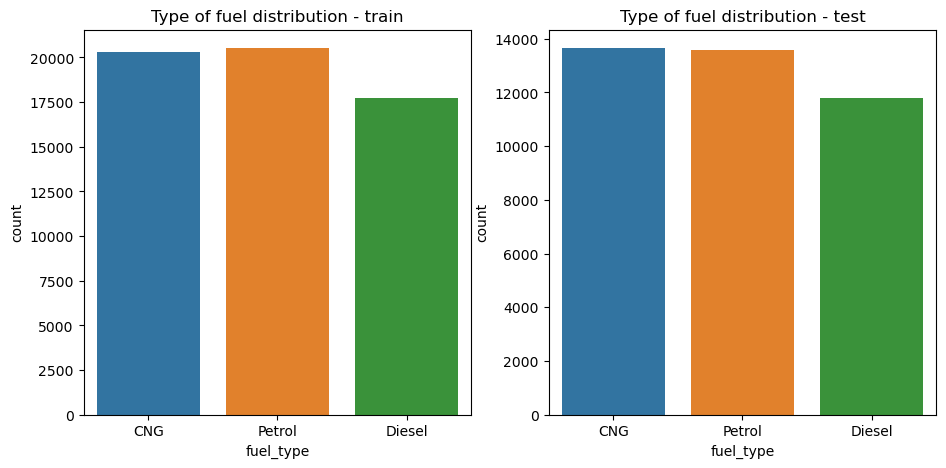

In [30]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "fuel_type", data = train, ax = ax[0])
ax[0].set_title("Type of fuel distribution - train")
sns.countplot(x = "fuel_type", data = test, ax = ax[1])
ax[1].set_title("Type of fuel distribution - test")

plt.show()

In [31]:
train["fuel_type"] = train["fuel_type"].astype("category")
test["fuel_type"] = test["fuel_type"].astype("category")

### `max_torque`, `max_torque_Nm`, `max_torque_rpm`
Maximum Torque generated by the car (Nm@rpm)

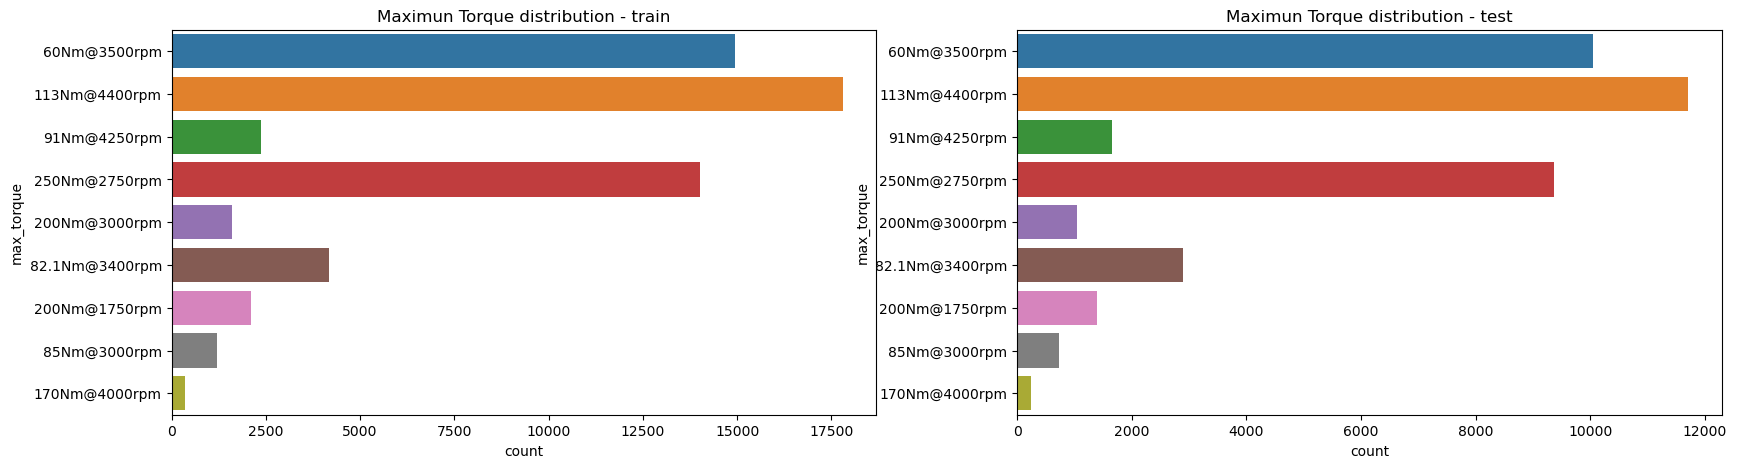

In [32]:
fig, ax = plt.subplots(1,2, figsize = (20, 5))
sns.countplot(y = "max_torque", data = train, ax = ax[0], order = [x for x in train["max_torque"].unique()])
ax[0].set_title("Maximun Torque distribution - train")
sns.countplot(y = "max_torque", data = test, ax = ax[1], order = [x for x in train["max_torque"].unique()])
ax[1].set_title("Maximun Torque distribution - test")

plt.show()

In [33]:
train[["max_torque", "max_power"]]

,max_torque,max_power
0,60Nm@3500rpm,40.36bhp@6000rpm
1,60Nm@3500rpm,40.36bhp@6000rpm
2,60Nm@3500rpm,40.36bhp@6000rpm
3,113Nm@4400rpm,88.50bhp@6000rpm
4,91Nm@4250rpm,67.06bhp@5500rpm
...,...,...
58587,91Nm@4250rpm,67.06bhp@5500rpm
58588,60Nm@3500rpm,40.36bhp@6000rpm
58589,60Nm@3500rpm,40.36bhp@6000rpm
58590,113Nm@4400rpm,88.50bhp@6000rpm


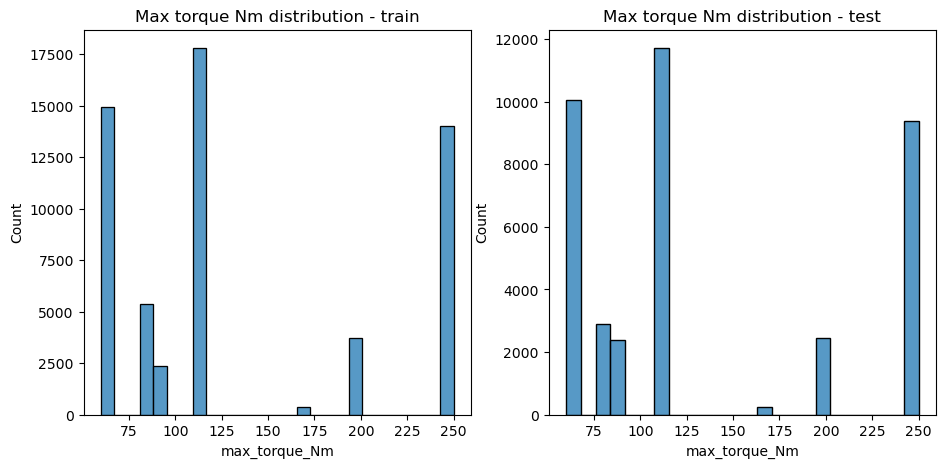

In [34]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_torque_Nm", data = train, ax = ax[0])
ax[0].set_title("Max torque Nm distribution - train")
sns.histplot(x = "max_torque_Nm", data = test, ax = ax[1])
ax[1].set_title("Max torque Nm distribution - test")

plt.show()

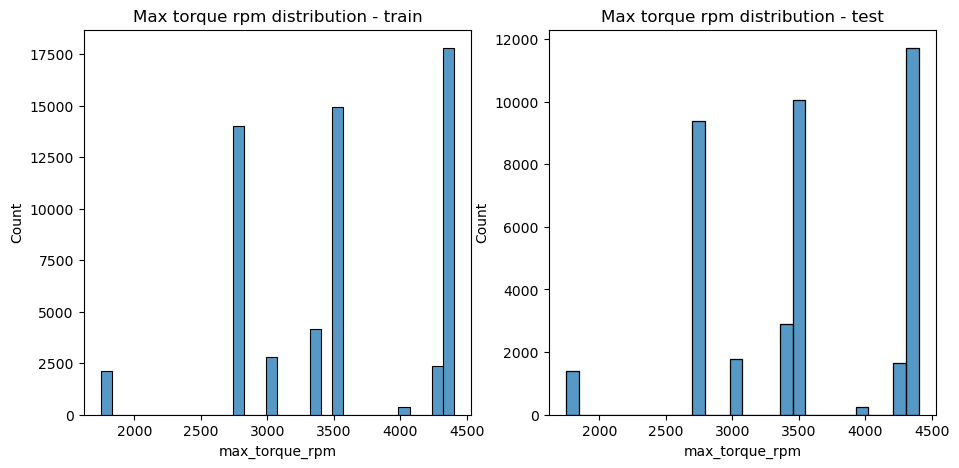

In [35]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_torque_rpm", data = train, ax = ax[0])
ax[0].set_title("Max torque rpm distribution - train")
sns.histplot(x = "max_torque_rpm", data = test, ax = ax[1])
ax[1].set_title("Max torque rpm distribution - test")

plt.show()

### `max_power`, `max_power_bhp`, `max_power_rpm`
Maximum Power generated by the car (bhp@rpm)

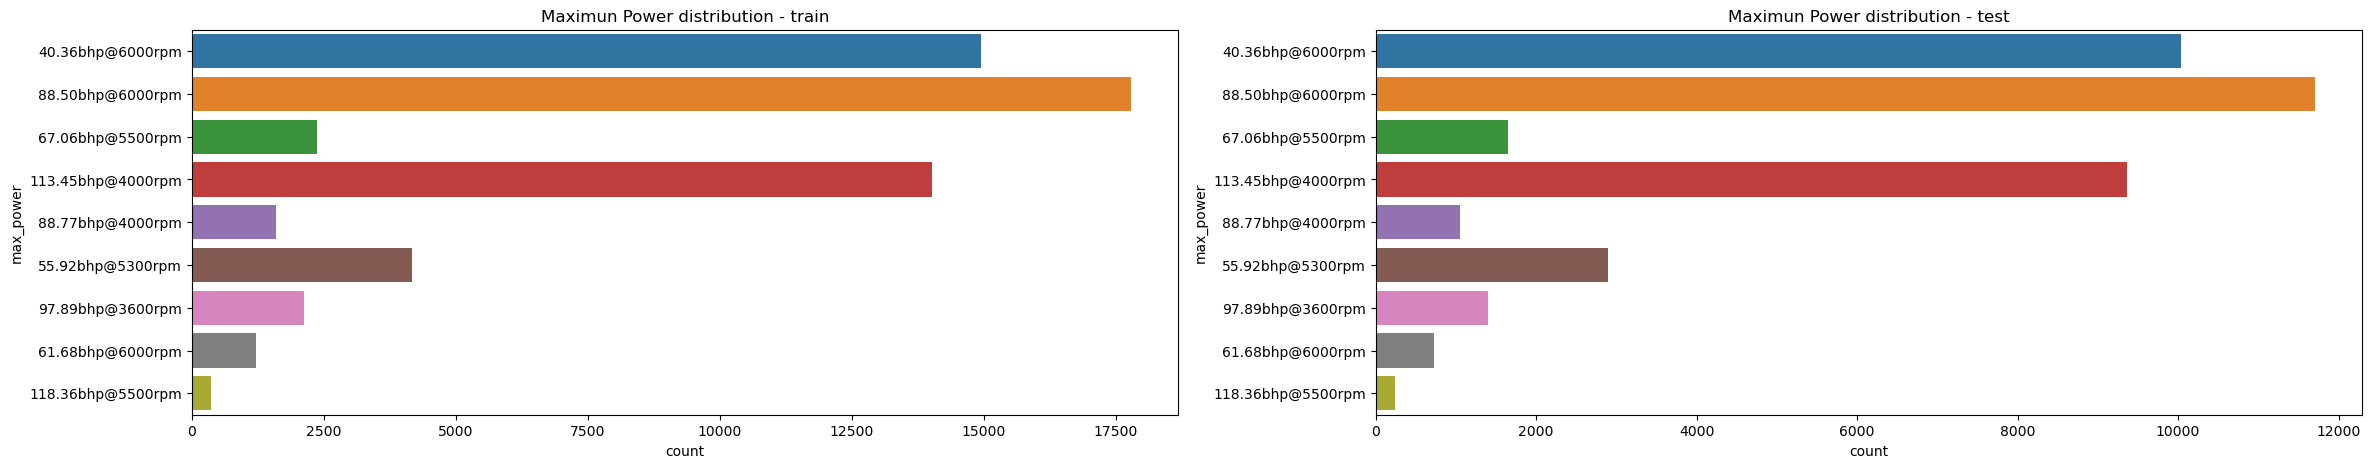

In [36]:
fig, ax = plt.subplots(1,2, figsize = (28, 5))
sns.countplot(y = "max_power", data = train, ax = ax[0], order = [x for x in train["max_power"].unique()])
ax[0].set_title("Maximun Power distribution - train")
sns.countplot(y = "max_power", data = test, ax = ax[1], order = [x for x in train["max_power"].unique()])
ax[1].set_title("Maximun Power distribution - test")

plt.show()

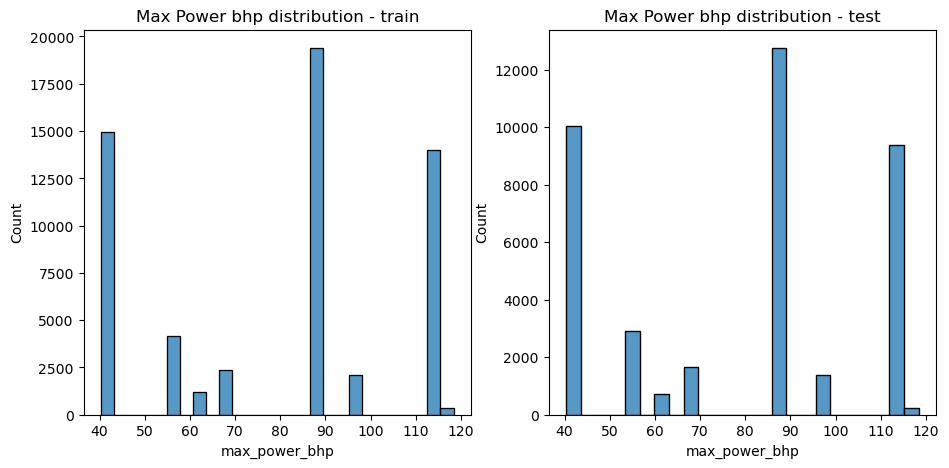

In [37]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_power_bhp", data = train, ax = ax[0])
ax[0].set_title("Max Power bhp distribution - train")
sns.histplot(x = "max_power_bhp", data = test, ax = ax[1])
ax[1].set_title("Max Power bhp distribution - test")

plt.show()

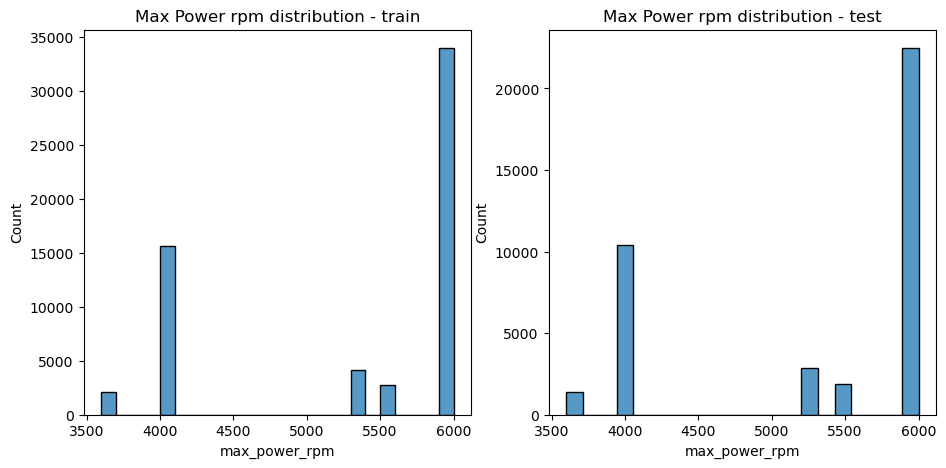

In [38]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_power_rpm", data = train, ax = ax[0])
ax[0].set_title("Max Power rpm distribution - train")
sns.histplot(x = "max_power_rpm", data = test, ax = ax[1])
ax[1].set_title("Max Power rpm distribution - test")

plt.show()

### `engine_type`
Type of engine used in the car

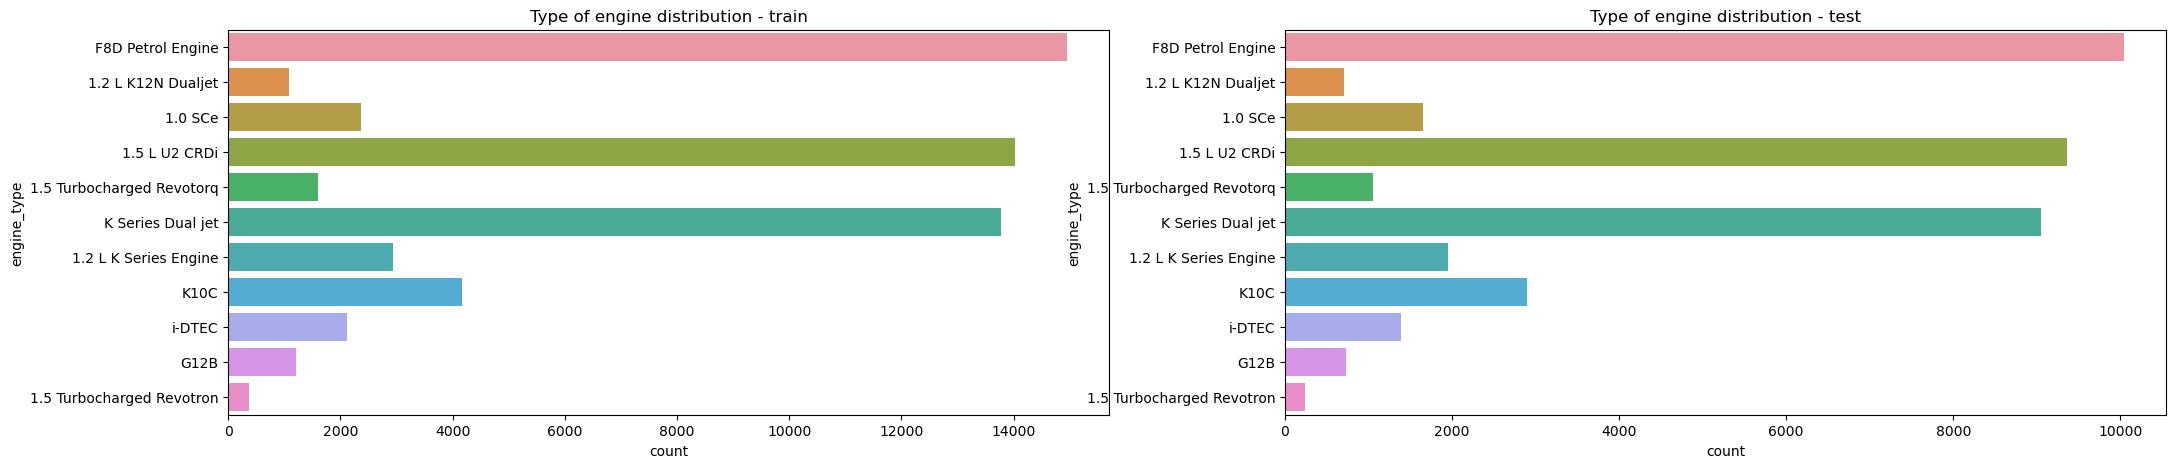

In [39]:
fig, ax = plt.subplots(1,2, figsize = (25, 5))
sns.countplot(y = "engine_type", data = train, ax = ax[0], order = [x for x in train["engine_type"].unique()])
ax[0].set_title("Type of engine distribution - train")
sns.countplot(y = "engine_type", data = test, ax = ax[1], order = [x for x in train["engine_type"].unique()])
ax[1].set_title("Type of engine distribution - test")

plt.show()

In [40]:
train["engine_type"] = train["engine_type"].astype("category")
test["engine_type"] = test["engine_type"].astype("category")

### `airbags`
Number of airbags installed in the car

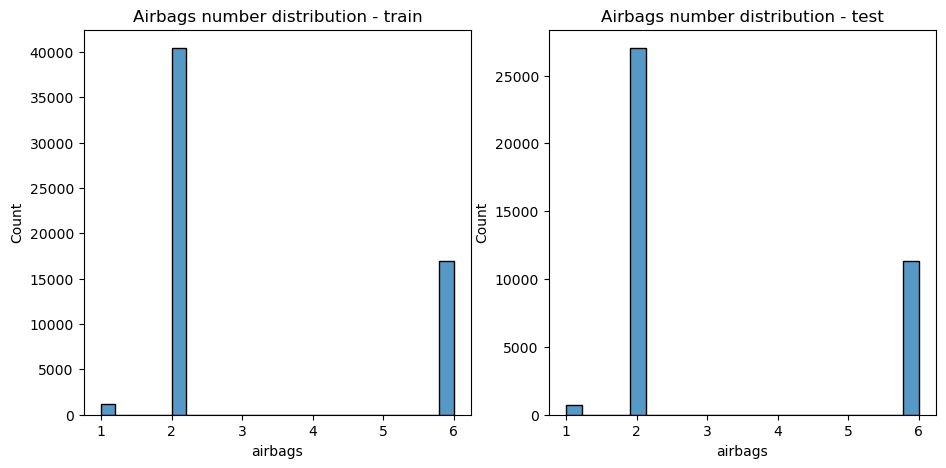

In [41]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "airbags", data = train, ax = ax[0])
ax[0].set_title("Airbags number distribution - train")
sns.histplot(x = "airbags", data = test, ax = ax[1])
ax[1].set_title("Airbags number distribution - test")

plt.show()

### `is_esc`
Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not
### `is_adjustable_steering`
Boolean flag indicating whether the steering wheel of the car is adjustable or not
### `is_tpms`
Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not
### `is_parking_sensors`
Boolean flag indicating whether parking sensors are present in the car or not
### `is_parking_camera`
Boolean flag indicating whether the parking camera is present in the car or not  

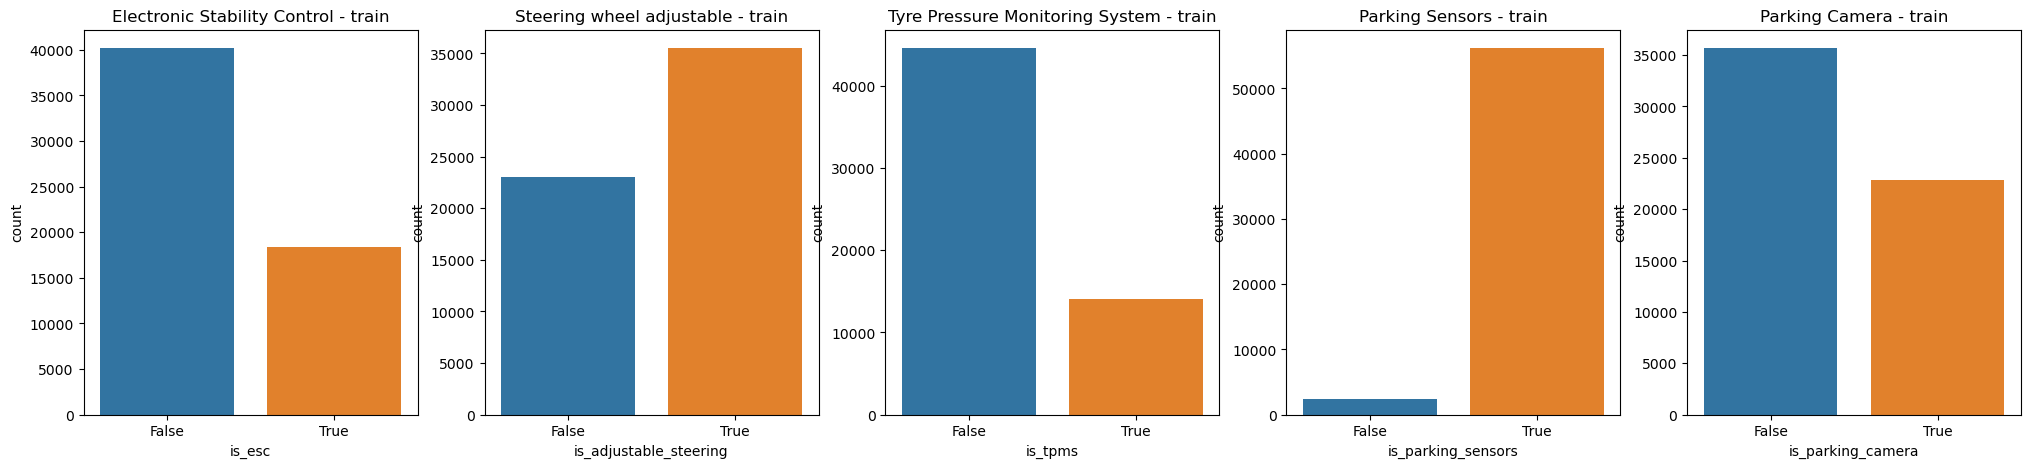

In [42]:
fig, ax = plt.subplots(1,5, figsize = (25, 5))
sns.countplot(x = "is_esc", data = train, ax = ax[0])
ax[0].set_title("Electronic Stability Control - train")
sns.countplot(x = "is_adjustable_steering", data = train, ax = ax[1])
ax[1].set_title("Steering wheel adjustable - train")
sns.countplot(x = "is_tpms", data = train, ax = ax[2])
ax[2].set_title("Tyre Pressure Monitoring System - train")
sns.countplot(x = "is_parking_sensors", data = train, ax = ax[3])
ax[3].set_title("Parking Sensors - train")
sns.countplot(x = "is_parking_camera", data = train, ax = ax[4])
ax[4].set_title("Parking Camera - train")

plt.show()

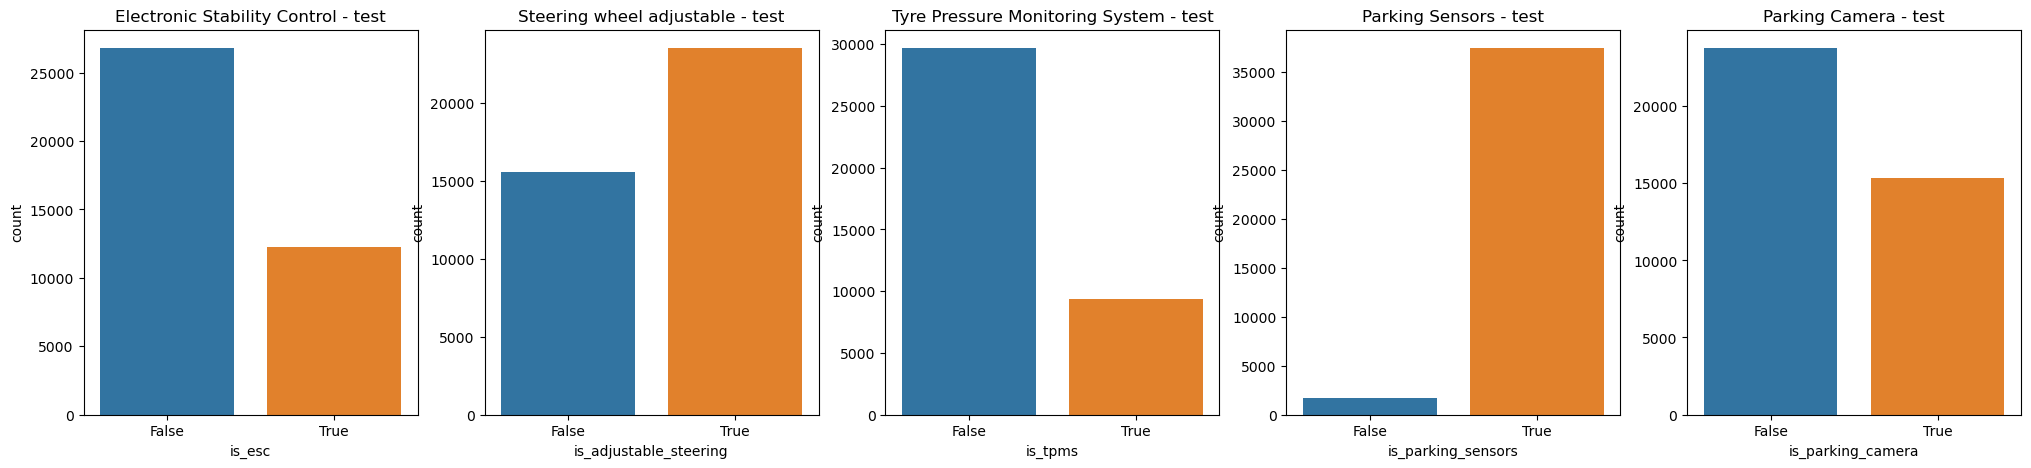

In [43]:
fig, ax = plt.subplots(1,5, figsize = (25, 5))
sns.countplot(x = "is_esc", data = test, ax = ax[0])
ax[0].set_title("Electronic Stability Control - test")
sns.countplot(x = "is_adjustable_steering", data = test, ax = ax[1])
ax[1].set_title("Steering wheel adjustable - test")
sns.countplot(x = "is_tpms", data = test, ax = ax[2])
ax[2].set_title("Tyre Pressure Monitoring System - test")
sns.countplot(x = "is_parking_sensors", data = test, ax = ax[3])
ax[3].set_title("Parking Sensors - test")
sns.countplot(x = "is_parking_camera", data = test, ax = ax[4])
ax[4].set_title("Parking Camera - test")

plt.show()

### `rear_brakes_type`
Type of brakes used in the rear of the car

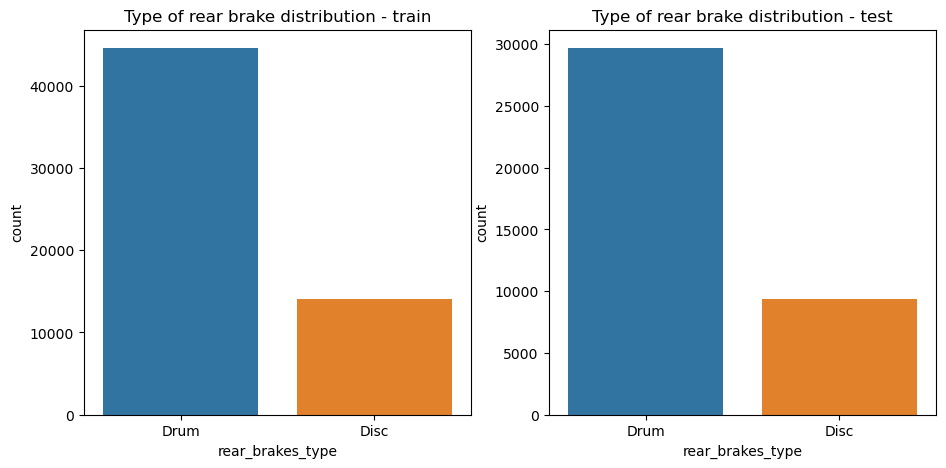

In [46]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "rear_brakes_type", data = train, ax = ax[0])
ax[0].set_title("Type of rear brake distribution - train")
sns.countplot(x = "rear_brakes_type", data = test, ax = ax[1])
ax[1].set_title("Type of rear brake distribution - test")

plt.show()

In [47]:
train["rear_brakes_type"] = train["rear_brakes_type"].astype("category")
test["rear_brakes_type"] = test["rear_brakes_type"].astype("category")

### `displacement`
Engine displacement of the car (cc)

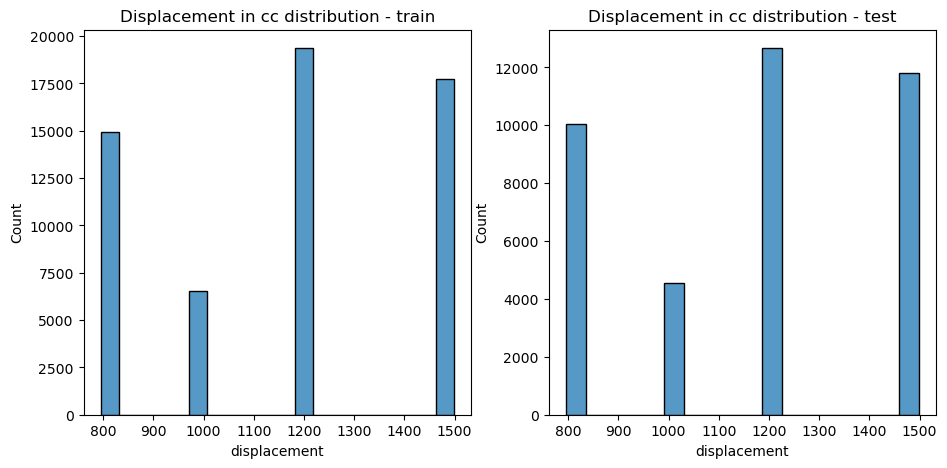

In [49]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "displacement", data = train, ax = ax[0])
ax[0].set_title("Displacement in cc distribution - train")
sns.histplot(x = "displacement", data = test, ax = ax[1])
ax[1].set_title("Displacement in cc distribution - test")

plt.show()

### `cylinder`
Number of cylinders present in the engine of the car

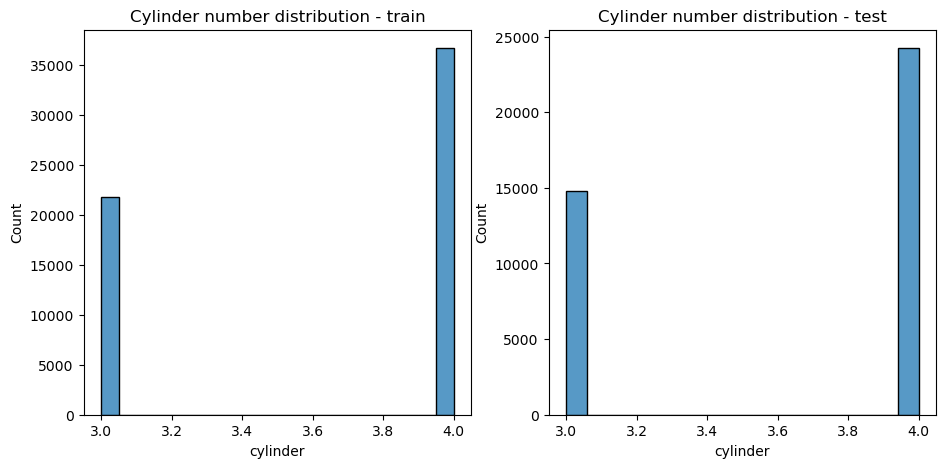

In [50]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "cylinder", data = train, ax = ax[0])
ax[0].set_title("Cylinder number distribution - train")
sns.histplot(x = "cylinder", data = test, ax = ax[1])
ax[1].set_title("Cylinder number distribution - test")

plt.show()

### `transmission_type`
Transmission type of the car

c:\Users\DIEGO MEZA\anaconda3\envs\CarInsuranceEnv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\DIEGO MEZA\anaconda3\envs\CarInsuranceEnv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


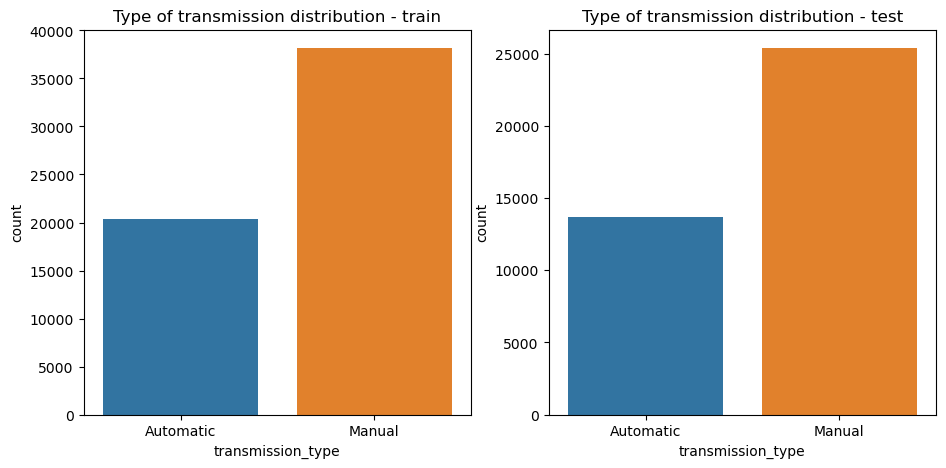

In [54]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "transmission_type", data = train, ax = ax[0])
ax[0].set_title("Type of transmission distribution - train")
sns.countplot(x = "transmission_type", data = test, ax = ax[1])
ax[1].set_title("Type of transmission distribution - test")

plt.show()

In [52]:
train["transmission_type"] = train["transmission_type"].astype("category")
test["transmission_type"] = test["transmission_type"].astype("category")

### `gear_box`
Number of gears in the car

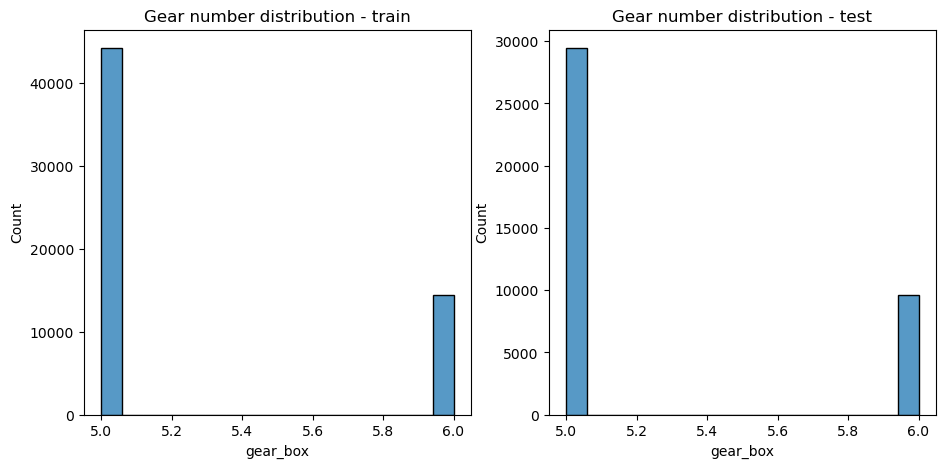

In [53]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "gear_box", data = train, ax = ax[0])
ax[0].set_title("Gear number distribution - train")
sns.histplot(x = "gear_box", data = test, ax = ax[1])
ax[1].set_title("Gear number distribution - test")

plt.show()

### `steering_type`
Type of the power steering present in the car

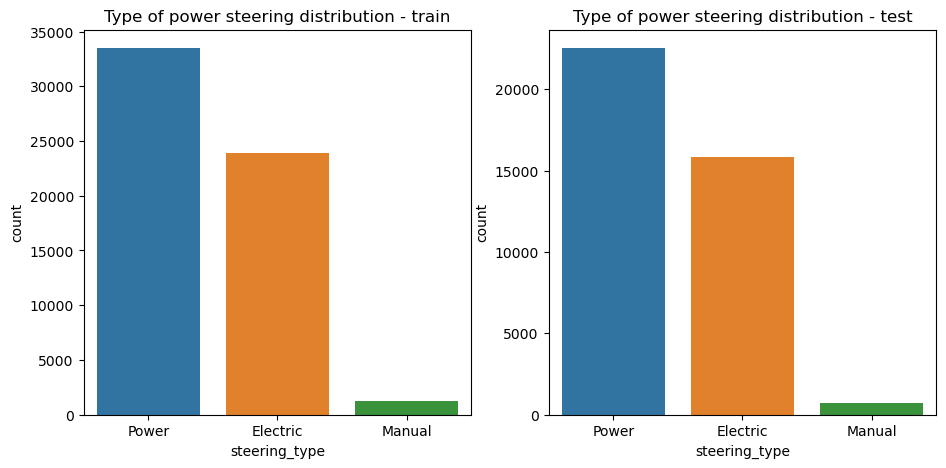

In [55]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "steering_type", data = train, ax = ax[0])
ax[0].set_title("Type of power steering distribution - train")
sns.countplot(x = "steering_type", data = test, ax = ax[1])
ax[1].set_title("Type of power steering distribution - test")

plt.show()

In [56]:
train["steering_type"] = train["steering_type"].astype("category")
test["steering_type"] = test["steering_type"].astype("category")

### `turning_radius`
The space a vehicle needs to make a certain turn (Meters)

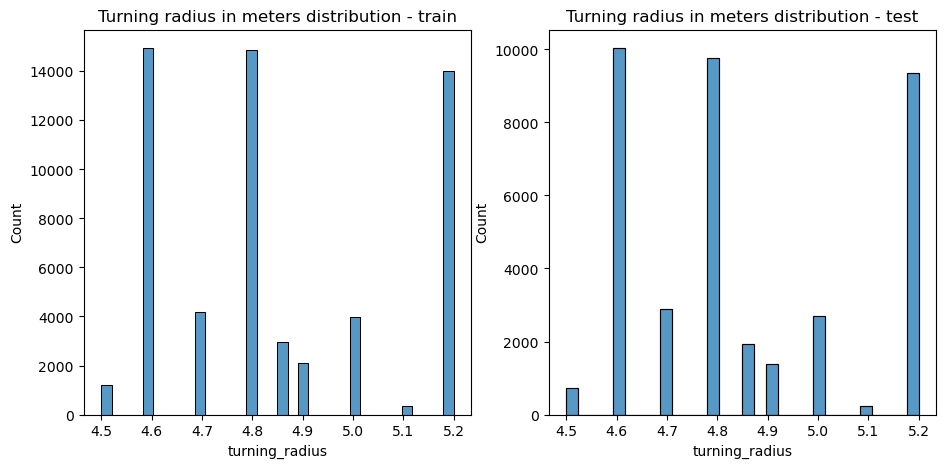

In [57]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "turning_radius", data = train, ax = ax[0])
ax[0].set_title("Turning radius in meters distribution - train")
sns.histplot(x = "turning_radius", data = test, ax = ax[1])
ax[1].set_title("Turning radius in meters distribution - test")

plt.show()

### `length`
Length of the car (Millimetre)

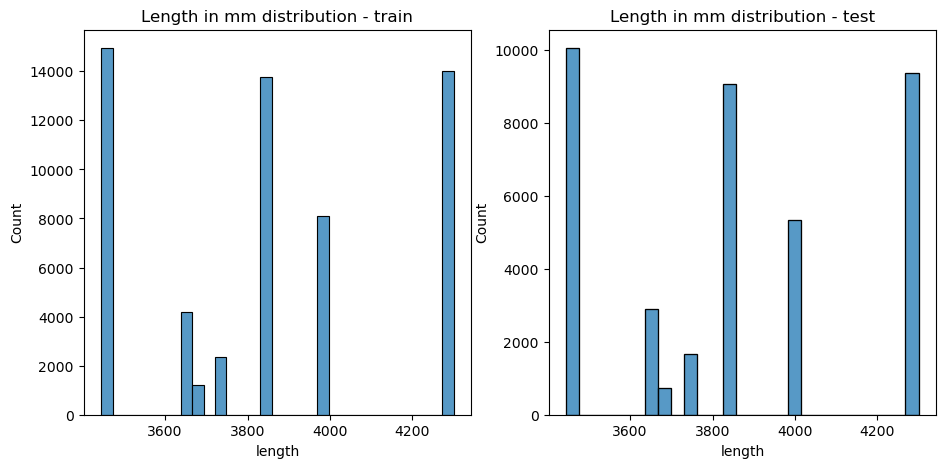

In [58]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "length", data = train, ax = ax[0])
ax[0].set_title("Length in mm distribution - train")
sns.histplot(x = "length", data = test, ax = ax[1])
ax[1].set_title("Length in mm distribution - test")

plt.show()

### `width`
Width of the car (Millimetre)

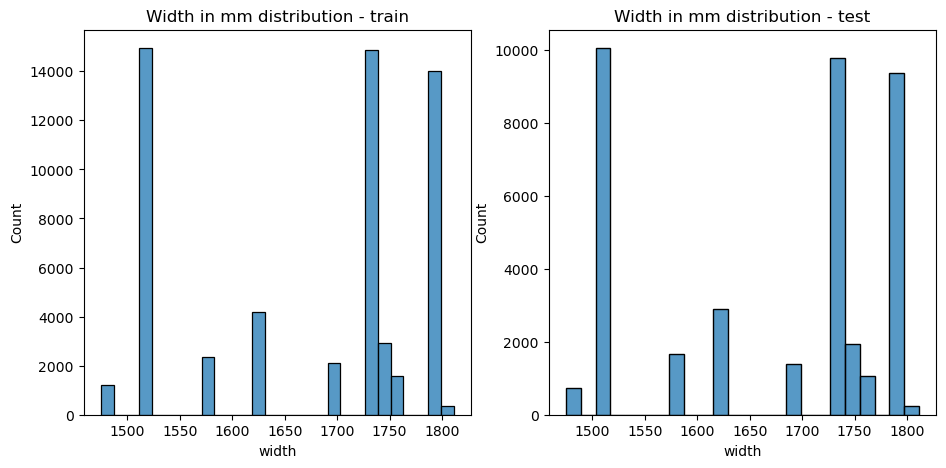

In [60]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "width", data = train, ax = ax[0])
ax[0].set_title("Width in mm distribution - train")
sns.histplot(x = "width", data = test, ax = ax[1])
ax[1].set_title("Width in mm distribution - test")

plt.show()

### `height`
Height of the car (Millimetre)

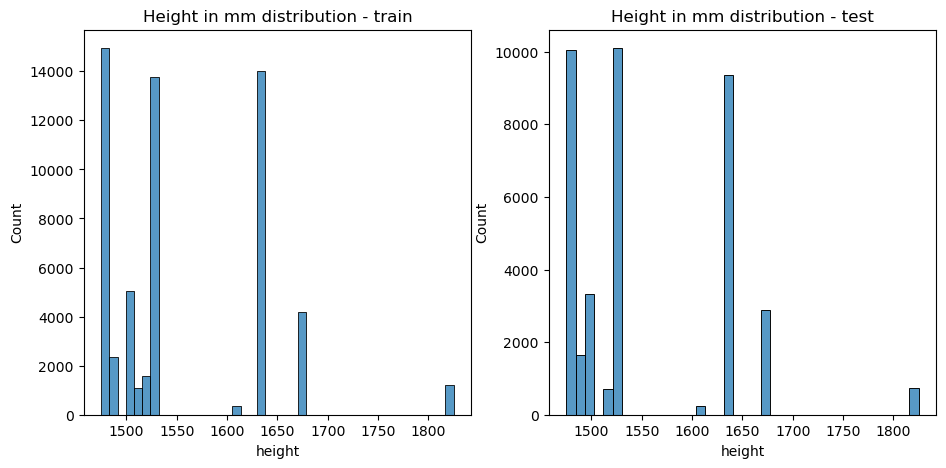

In [65]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "height", data = train, ax = ax[0])
ax[0].set_title("Height in mm distribution - train")
sns.histplot(x = "height", data = test, ax = ax[1])
ax[1].set_title("Height in mm distribution - test")

plt.show()

### `gross_weight`
The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

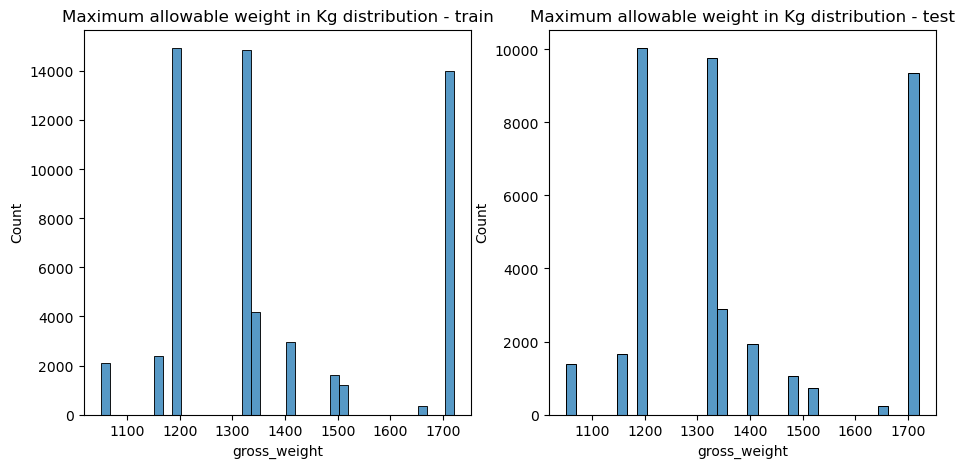

In [66]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "gross_weight", data = train, ax = ax[0])
ax[0].set_title("Maximum allowable weight in Kg distribution - train")
sns.histplot(x = "gross_weight", data = test, ax = ax[1])
ax[1].set_title("Maximum allowable weight in Kg distribution - test")

plt.show()

### `is_front_fog_lights`
Boolean flag indicating whether front fog lights are available in the car or not
### `is_rear_window_wiper`
Boolean flag indicating whether the rear window wiper is available in the car or not
### `is_rear_window_washer`
Boolean flag indicating whether the rear window washer is available in the car or not
### `is_rear_window_defogger`
Boolean flag indicating whether rear window defogger is available in the car or not
### `is_brake_assist`
Boolean flag indicating whether the brake assistance feature is available in the car or not
### `is_power_door_locks`
Boolean flag indicating whether a power door lock is available in the car or not

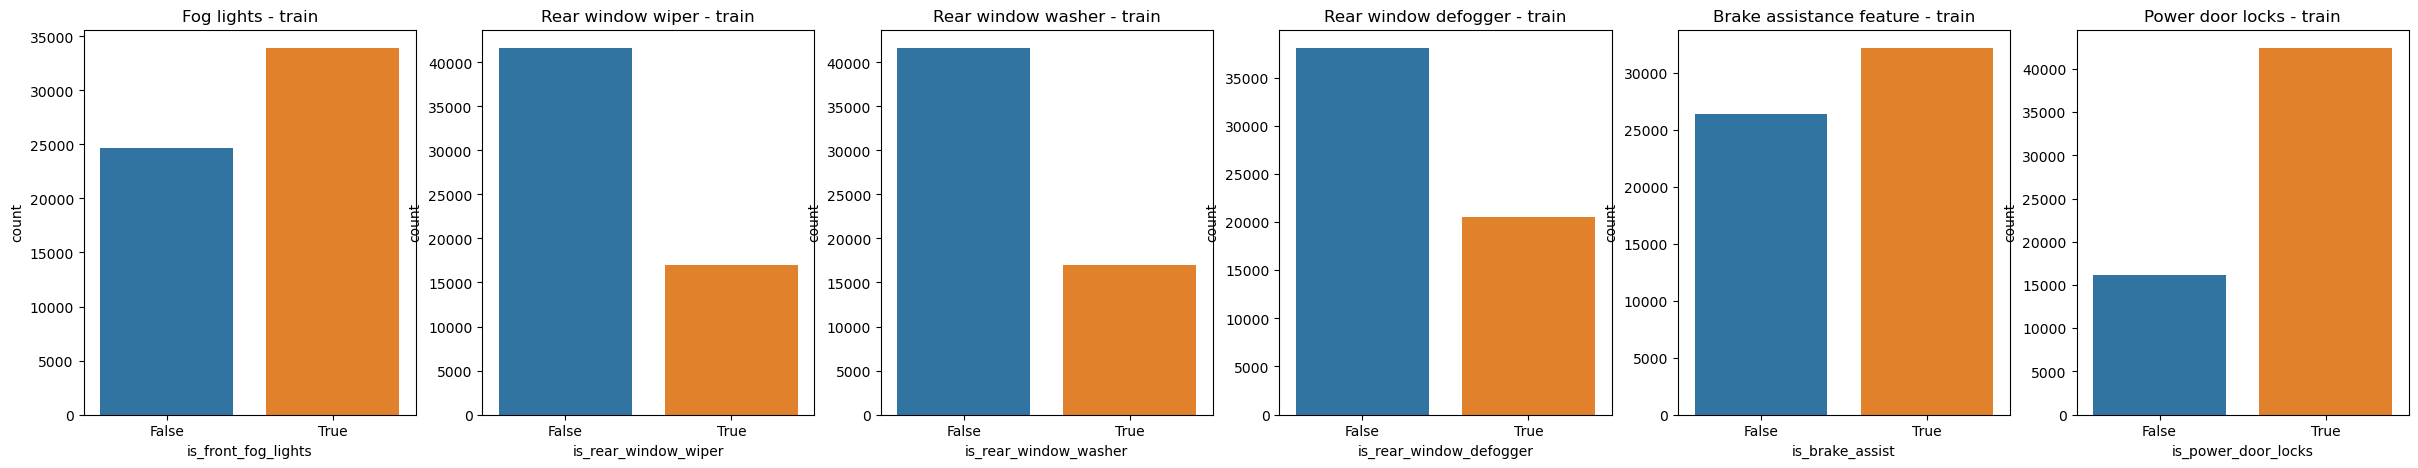

In [68]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_front_fog_lights", data = train, ax = ax[0])
ax[0].set_title("Fog lights - train")
sns.countplot(x = "is_rear_window_wiper", data = train, ax = ax[1])
ax[1].set_title("Rear window wiper - train")
sns.countplot(x = "is_rear_window_washer", data = train, ax = ax[2])
ax[2].set_title("Rear window washer - train")
sns.countplot(x = "is_rear_window_defogger", data = train, ax = ax[3])
ax[3].set_title("Rear window defogger - train")
sns.countplot(x = "is_brake_assist", data = train, ax = ax[4])
ax[4].set_title("Brake assistance feature - train")
sns.countplot(x = "is_power_door_locks", data = train, ax = ax[5])
ax[5].set_title("Power door locks - train")

plt.show()

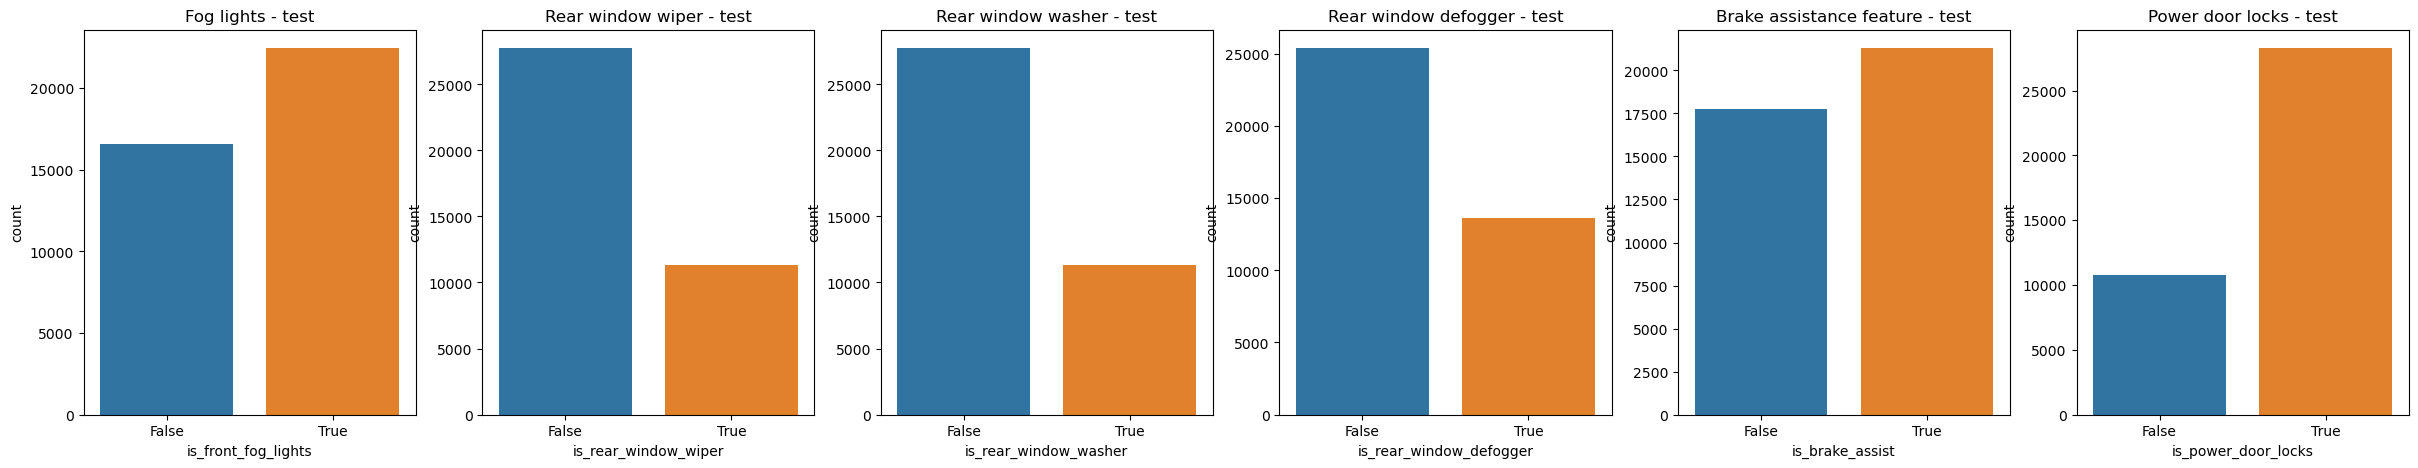

In [69]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_front_fog_lights", data = test, ax = ax[0])
ax[0].set_title("Fog lights - test")
sns.countplot(x = "is_rear_window_wiper", data = test, ax = ax[1])
ax[1].set_title("Rear window wiper - test")
sns.countplot(x = "is_rear_window_washer", data = test, ax = ax[2])
ax[2].set_title("Rear window washer - test")
sns.countplot(x = "is_rear_window_defogger", data = test, ax = ax[3])
ax[3].set_title("Rear window defogger - test")
sns.countplot(x = "is_brake_assist", data = test, ax = ax[4])
ax[4].set_title("Brake assistance feature - test")
sns.countplot(x = "is_power_door_locks", data = test, ax = ax[5])
ax[5].set_title("Power door locks - test")

plt.show()

### `is_central_locking`
Boolean flag indicating whether the central locking feature is available in the car or not  
### `is_power_steering`
Boolean flag indicating whether power steering is available in the car or not  
### `is_driver_seat_height_adjustable`
Boolean flag indicating whether the height of the driver seat is adjustable or not  
### `is_day_night_rear_view_mirror`
Boolean flag indicating whether day & night rearview mirror is present in the car or not  
### `is_ecw`
Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not  
### `is_speed_alert`
Boolean flag indicating whether the speed alert system is available in the car or not

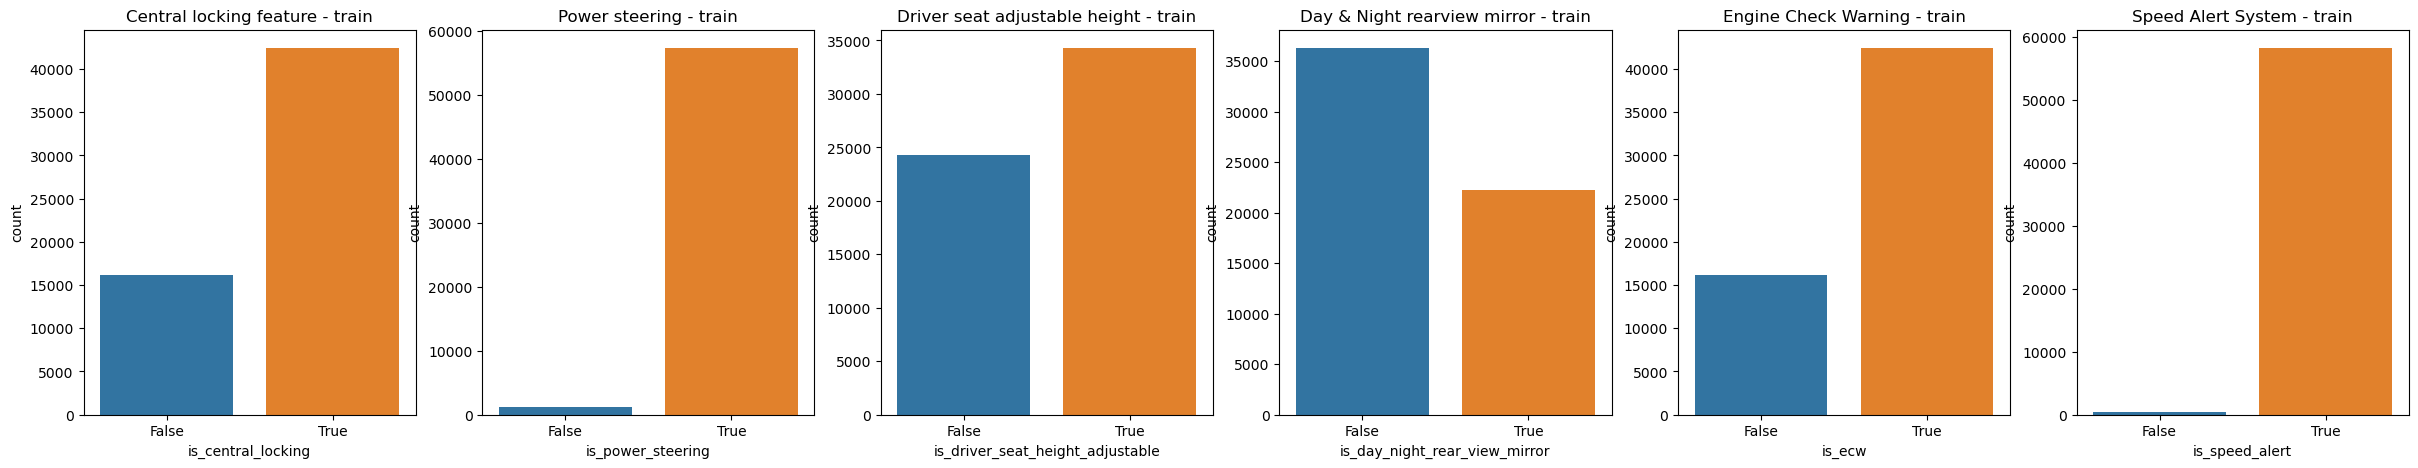

In [71]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_central_locking", data = train, ax = ax[0])
ax[0].set_title("Central locking feature - train")
sns.countplot(x = "is_power_steering", data = train, ax = ax[1])
ax[1].set_title("Power steering - train")
sns.countplot(x = "is_driver_seat_height_adjustable", data = train, ax = ax[2])
ax[2].set_title("Driver seat adjustable height - train")
sns.countplot(x = "is_day_night_rear_view_mirror", data = train, ax = ax[3])
ax[3].set_title("Day & Night rearview mirror - train")
sns.countplot(x = "is_ecw", data = train, ax = ax[4])
ax[4].set_title("Engine Check Warning - train")
sns.countplot(x = "is_speed_alert", data = train, ax = ax[5])
ax[5].set_title("Speed Alert System - train")

plt.show()

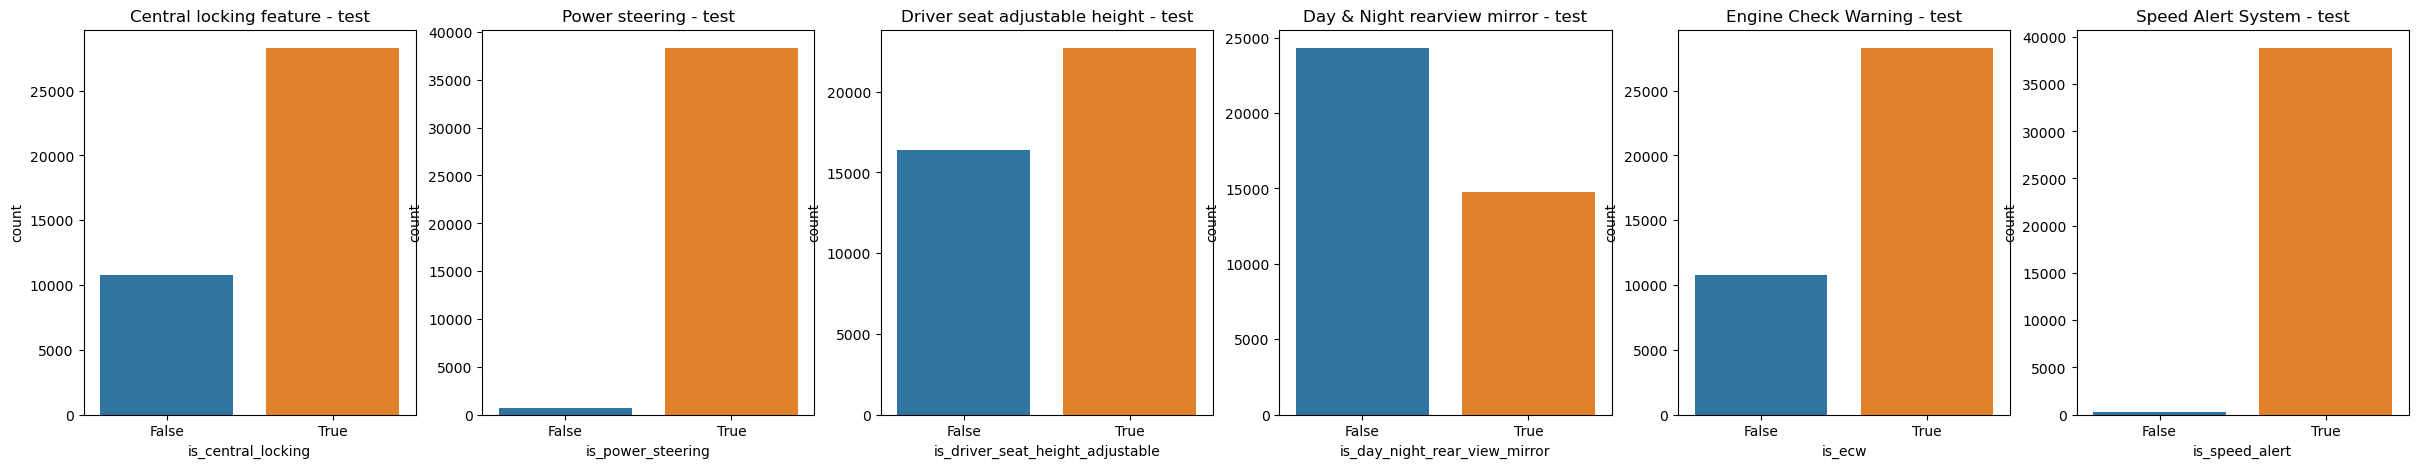

In [72]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_central_locking", data = test, ax = ax[0])
ax[0].set_title("Central locking feature - test")
sns.countplot(x = "is_power_steering", data = test, ax = ax[1])
ax[1].set_title("Power steering - test")
sns.countplot(x = "is_driver_seat_height_adjustable", data = test, ax = ax[2])
ax[2].set_title("Driver seat adjustable height - test")
sns.countplot(x = "is_day_night_rear_view_mirror", data = test, ax = ax[3])
ax[3].set_title("Day & Night rearview mirror - test")
sns.countplot(x = "is_ecw", data = test, ax = ax[4])
ax[4].set_title("Engine Check Warning - test")
sns.countplot(x = "is_speed_alert", data = test, ax = ax[5])
ax[5].set_title("Speed Alert System - test")

plt.show()

### `ncap_rating`
Safety rating given by NCAP (out of 5)

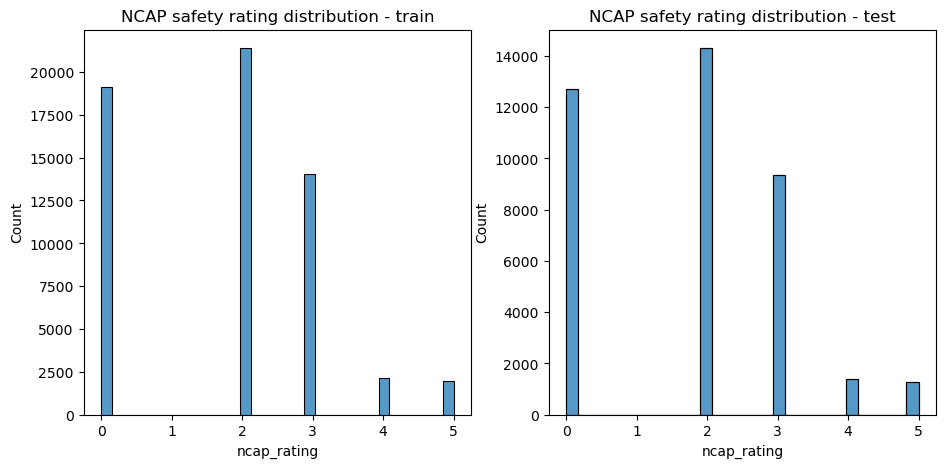

In [73]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "ncap_rating", data = train, ax = ax[0])
ax[0].set_title("NCAP safety rating distribution - train")
sns.histplot(x = "ncap_rating", data = test, ax = ax[1])
ax[1].set_title("NCAP safety rating distribution - test")

plt.show()

### `is_claim`
Outcome - Boolean flag indicating whether the policyholder file a claim in the next 6 months or not

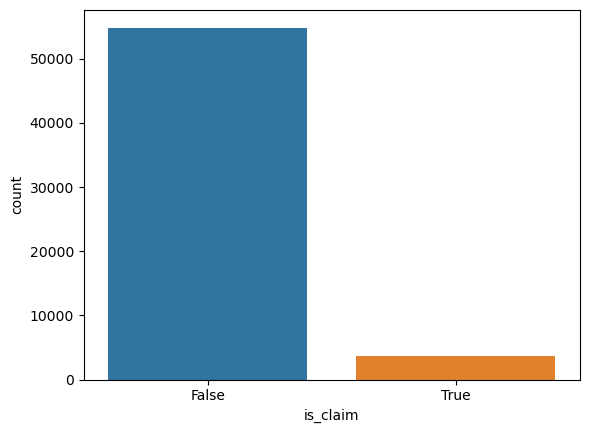

In [75]:
sns.countplot(x = "is_claim", data = train)
plt.show()

## Explore the relationships between variables

In [77]:
train.corr(numeric_only = True)

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.103981,0.105427,0.192941,0.094240,-0.016007,0.111614,...,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747,0.150604,0.019754,0.207171,-0.101081
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.209073,0.225892,0.370190,0.194777,-0.023809,0.228212,...,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172,0.308669,0.017598,0.409716,-0.212649
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.008041,-0.014844,0.011201,-0.002840,0.026347,-0.039199,...,0.010981,0.003207,-0.038864,0.001643,-0.031628,0.022435,-0.015626,0.034706,-0.011833,0.037502
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.060359,-0.059533,-0.090283,-0.057928,-0.010347,-0.051064,...,-0.091361,-0.038308,-0.096469,-0.004316,-0.071150,-0.017808,-0.075072,-0.000723,-0.096678,0.049189
airbags,0.103981,0.209073,-0.008041,-0.060359,1.000000,0.941230,0.522994,0.876072,0.127473,0.798015,...,0.545170,-0.260462,0.408046,0.048989,0.341557,0.002789,0.800408,-0.424315,0.694593,-0.670312
is_esc,0.105427,0.225892,-0.014844,-0.059533,0.941230,1.000000,0.517896,0.828793,0.139016,0.845105,...,0.569611,-0.225575,0.417517,-0.116688,0.361063,0.002995,0.777420,-0.371007,0.711334,-0.620453
is_adjustable_steering,0.192941,0.370190,0.011201,-0.090283,0.522994,0.517896,1.000000,0.451872,0.254973,0.449247,...,0.931436,0.460479,0.765782,0.097987,0.645792,0.013917,0.707465,-0.008383,0.893360,-0.445521
is_tpms,0.094240,0.194777,-0.002840,-0.057928,0.876072,0.828793,0.451872,1.000000,0.115215,0.700417,...,0.472089,-0.439321,0.346035,0.044278,0.500452,0.000703,0.885884,-0.604996,0.697943,-0.799604
is_parking_sensors,-0.016007,-0.023809,0.026347,-0.010347,0.127473,0.139016,0.254973,0.115215,1.000000,-0.256603,...,0.244054,-0.262257,-0.126773,-0.016221,-0.035492,0.008419,0.122044,-0.202867,0.088390,-0.043216
is_parking_camera,0.111614,0.228212,-0.039199,-0.051064,0.798015,0.845105,0.449247,0.700417,-0.256603,1.000000,...,0.505523,-0.014231,0.494042,-0.098614,0.477036,-0.000871,0.756528,-0.452623,0.691482,-0.710492


[]

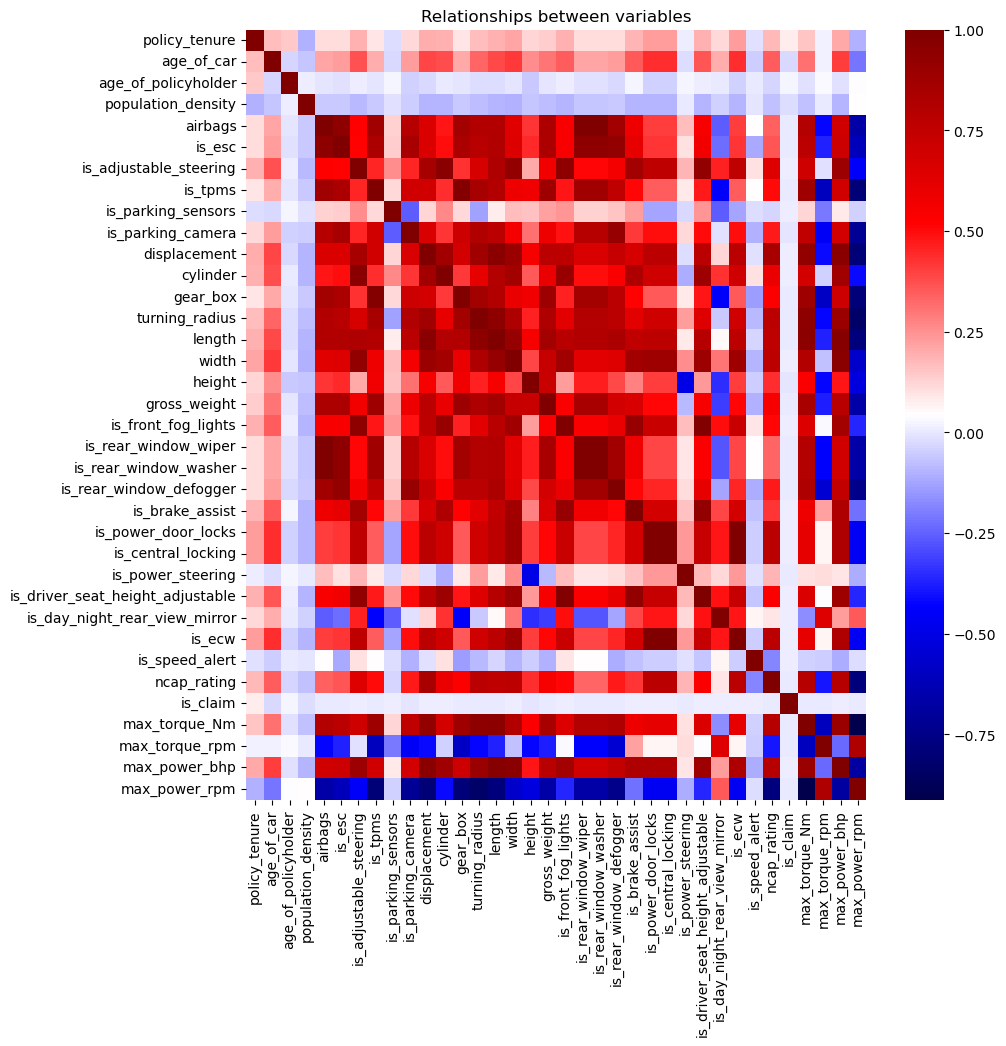

In [83]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train.corr(numeric_only = True), cmap = "seismic")
plt.title("Relationships between variables")
plt.plot()

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   policy_id                         58592 non-null  object  
 1   policy_tenure                     58592 non-null  float64 
 2   age_of_car                        58592 non-null  float64 
 3   age_of_policyholder               58592 non-null  float64 
 4   area_cluster                      58592 non-null  category
 5   population_density                58592 non-null  int64   
 6   make                              58592 non-null  category
 7   segment                           58592 non-null  category
 8   model                             58592 non-null  category
 9   fuel_type                         58592 non-null  category
 10  max_torque                        58592 non-null  object  
 11  max_power                         58592 non-null  obje